딥러닝 5주차 과제 (2)
==
신용카드 소스 코드를 DSA 데이터에 적용해볼 것

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# 1. 데이터 로드 및 전처리
# DSA 데이터셋을 불러옵니다.

df = pd.read_csv('DSA_features.csv')

In [3]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [4]:
df.shape

(9120, 272)

In [5]:
# 결측치 홗인

df.isnull().values.any()

False

In [6]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [7]:
df['activity'].value_counts()

,count
activity,
sitting,480
walkingTreadmillIncline,480
jumping,480
rowing,480
cyclingVertical,480
cyclingHorizontal,480
crossTrainer,480
stepper,480
runningTreadmill,480


In [8]:
# 2. 사용할 activity만 남기고 나머지 행은 삭제
# *   lyingRigh = Normal
# *   lyingBack = Normal
# *   jumping = Abnormal

df_filtered = df[df['activity'].isin(['lyingRigh','lyingBack', 'jumping'])]
df_filtered = df_filtered.drop('people', axis=1)
df_filtered.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.41744,-0.59561,0.001016,...,9.725263e-07,0.000986,0.074676,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,-0.193301,lyingBack
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.40372,-0.63184,0.001297,...,6.211659e-07,0.000788,-0.181526,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,-0.372381,lyingBack
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.42616,-0.59561,0.000863,...,4.579046e-07,0.000677,-0.263115,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,0.185587,lyingBack
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.30877,-0.55225,0.003587,...,4.703523e-07,0.000686,-0.060925,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,-0.145321,lyingBack
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.38900,-0.53714,0.001059,...,5.467316e-07,0.000739,0.335811,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,-0.026271,lyingBack


In [9]:
df_filtered.shape

(1440, 271)

In [10]:
# Normal/Abnormal에 따라 라벨 추가

def label_activity(activity):
    if activity in ['lyingRigh', 'lyingBack']:
        return 0
    elif activity == 'jumping':
        return 1
    else:
        return None

df_filtered['label'] = df_filtered['activity'].apply(label_activity)
df_filtered = df_filtered.drop('activity', axis=1)

print(df_filtered.head())

     T_xacc_mean  T_xacc_max  T_xacc_min  T_xacc_var  T_xacc_std  T_xacc_skew  \
960    -4.834646     -4.7185     -4.9049    0.001124    0.033529     0.632141   
961    -4.780810     -4.5850     -4.8833    0.003948    0.062835     1.052880   
962    -4.804400     -4.7037     -4.8755    0.001482    0.038496     0.735226   
963    -4.750563     -4.5696     -4.8977    0.004447    0.066683     0.710263   
964    -4.774916     -4.6741     -4.8457    0.001080    0.032868     0.324779   

     T_yacc_mean  T_yacc_max  T_yacc_min  T_yacc_var  ...   LL_ymag_var  \
960    -0.501018    -0.41744    -0.59561    0.001016  ...  9.725263e-07   
961    -0.480601    -0.40372    -0.63184    0.001297  ...  6.211659e-07   
962    -0.493925    -0.42616    -0.59561    0.000863  ...  4.579046e-07   
963    -0.437358    -0.30877    -0.55225    0.003587  ...  4.703523e-07   
964    -0.459456    -0.38900    -0.53714    0.001059  ...  5.467316e-07   

     LL_ymag_std  LL_ymag_skew  LL_zmag_mean  LL_zmag_max  LL_

In [11]:
LABELS = ["Normal", "Abnormal"]

<ipython-input-12-cc4300ada400>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df_filtered['label'], sort = True)


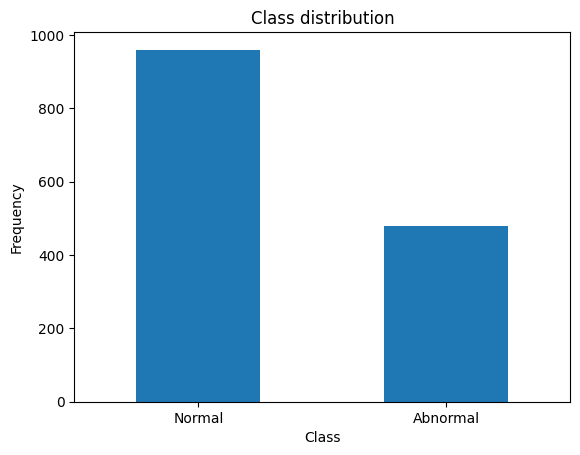

In [12]:
count_classes = pd.value_counts(df_filtered['label'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [13]:
# 크기 확인

abnormal = df_filtered[df_filtered['label'] == 1]
normal = df_filtered[df_filtered['label'] == 0]

print("Shape of abnormal class:", abnormal.shape)
print("Shape of normal class:", normal.shape)

Shape of abnormal class: (480, 271)
Shape of normal class: (960, 271)


In [14]:
# 모델을 오직 정상 정보로만 훈련
# 정상 정보를 테스트셋에 넣으면 모델의 성능을 평가

In [15]:
RANDOM_SEED = 42

In [16]:
X_train, X_test = train_test_split(df_filtered, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.label == 0]
X_train = X_train.drop(['label'], axis=1)

y_test = X_test['label']
X_test = X_test.drop(['label'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(765, 270)

In [17]:
# 테스트 레이블을 남겨두는 이유는 나중에 정확도를 비교하기 위해서임

In [18]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [19]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 14)                  │           3,794 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 270)                 │           2,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,115 (23.89 KB)

 Trainable params: 6,115 (23.89 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split = 0.1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 5.7653 - val_loss: 5.7145
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 5.8052 - val_loss: 5.7079
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.7841 - val_loss: 5.7026
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.7922 - val_loss: 5.6972
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.7196 - val_loss: 5.6910
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 5.7188 - val_loss: 5.6844
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 5.7787 - val_loss: 5.6765
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 5.7409 - val_loss: 5.6669
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 5.7028 - val_loss: 5.6554
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 5.6936 - val_loss: 5.6416
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.7176 - val_loss: 5.6248
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5.6796 - val_loss: 5.6051


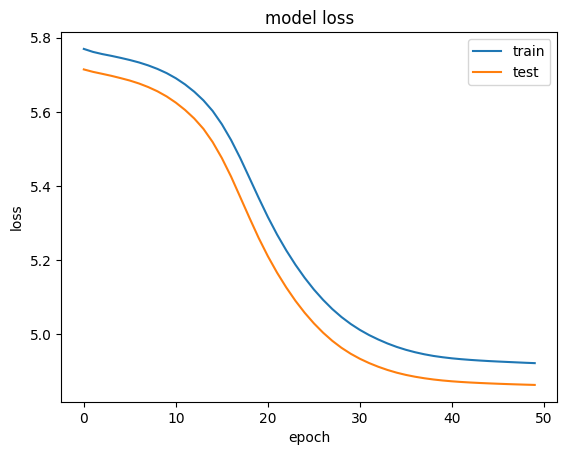

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [22]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,reconstruction_error,true_class
count,288.000000,288.000000
mean,167.407805,0.322917
std,325.497200,0.468405
min,4.530634,0.000000
25%,4.669120,0.000000
50%,4.989147,0.000000
75%,126.017398,1.000000
max,1734.604859,1.000000


In [23]:
error_df.head()

,reconstruction_error,true_class
1128,5.014543,0
1565,4.939558,0
1508,5.184188,0
1025,5.608951,0
1588,4.942032,0


In [24]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 10

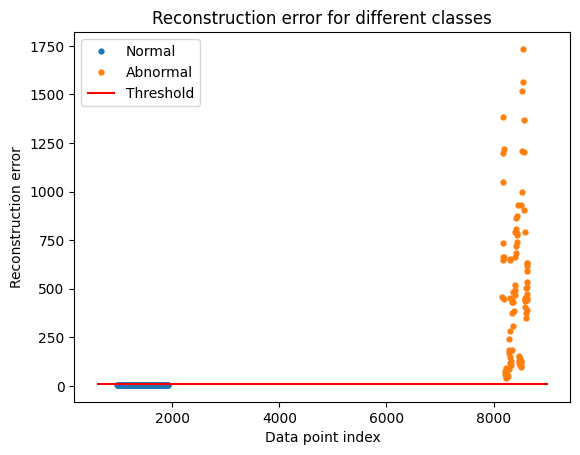

In [25]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

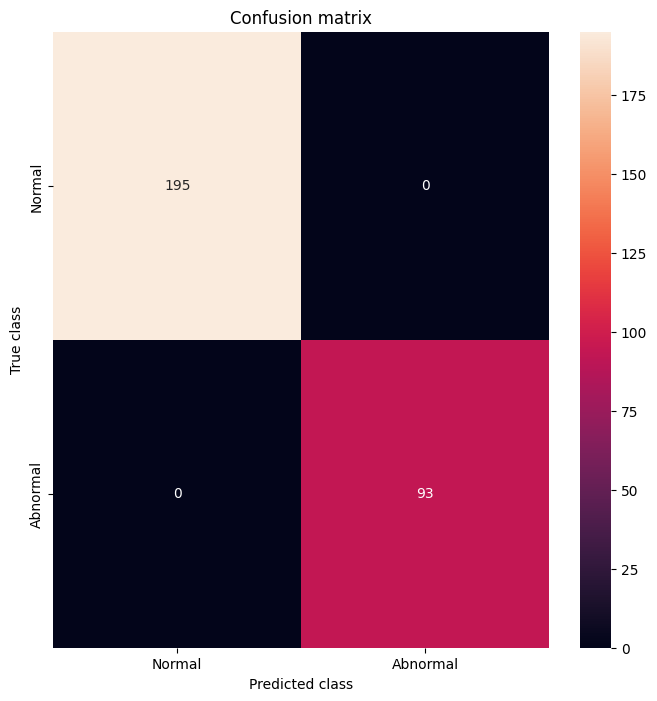

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00        93

    accuracy                           1.00       288
   macro avg       1.00      1.00      1.00       288
weighted avg       1.00      1.00      1.00       288



In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))